In [92]:
import seaborn as sns
import pandas as pd
import numpy as np

In [93]:
data = pd.read_csv("data/BioVis-challenge-test-data.csv")
data = data.loc[data["UniAcc"] == "P04075" ]
data

,UniAcc,RES,POS,MOD,Entry,Gene,Species,classification,PathogenicMutation
0,P04075,M,1,[4]Carbamidomethyl,ALDOA_HUMAN,ALDOA,HUMAN,Chemical derivative,False
1,P04075,Y,3,[4]Carbamidomethyl,ALDOA_HUMAN,ALDOA,HUMAN,Artefact,False
2,P04075,Y,5,[4]Carbamidomethyl,ALDOA_HUMAN,ALDOA,HUMAN,Artefact,False
3,P04075,E,11,[4]Carbamidomethyl,ALDOA_HUMAN,ALDOA,HUMAN,Artefact,False
4,P04075,K,13,[4]Carbamidomethyl,ALDOA_HUMAN,ALDOA,HUMAN,Artefact,False
...,...,...,...,...,...,...,...,...,...
6864,P04075,K,153,[991]ISD_z+2_ion,ALDOA_HUMAN,ALDOA,HUMAN,NaN,False
6865,P04075,R,173,[991]ISD_z+2_ion,ALDOA_HUMAN,ALDOA,HUMAN,NaN,False
6866,P04075,C,178,[993]Biotin:Sigma-B1267,ALDOA_HUMAN,ALDOA,HUMAN,Chemical derivative,False
6867,P04075,Y,174,[997]sulfo+amino,ALDOA_HUMAN,ALDOA,HUMAN,Chemical derivative,False


In [94]:
PTMS = data["MOD"].unique()
n_PTMs = len(PTMS)
protein_length = 364
d = pd.DataFrame(np.zeros((n_PTMs, protein_length)), index=PTMS)

for idx, row in data.iterrows():
    pos = row["POS"]
    mod = row["MOD"]
    d.loc[mod, pos-1] = 1.0
d

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
[4]Carbamidomethyl,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
[122]Formyl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
[7]Deamidated,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
[34]Methyl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
[35]Oxidation,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[947]LG-pyrrole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[991]ISD_z+2_ion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[993]Biotin:Sigma-B1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[997]sulfo+amino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


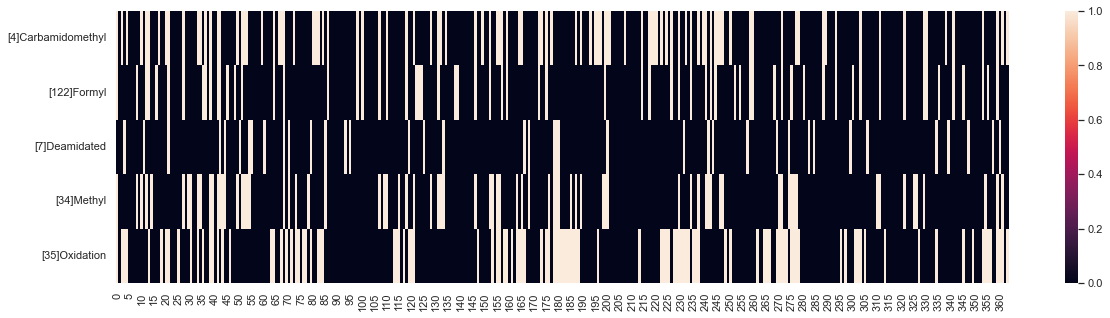

In [95]:
sns.set(rc={"figure.figsize":(20, 5)}) #width=6, height=5
d = d.iloc[:5]
ax = sns.heatmap(d)

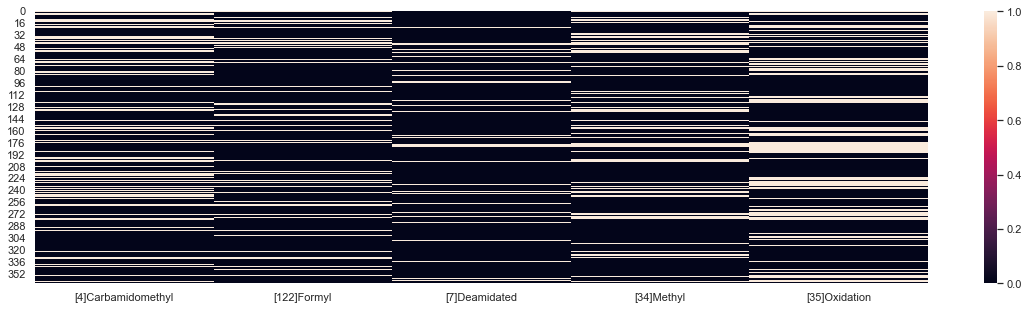

In [96]:
ax = sns.heatmap(d.transpose())

In [97]:
# binning over window = 5

def aggregate(a):
    return a[:(a.size // 5) * 5].reshape(-1, 5).sum(axis=1)

binned = np.apply_along_axis(aggregate, 1, d)

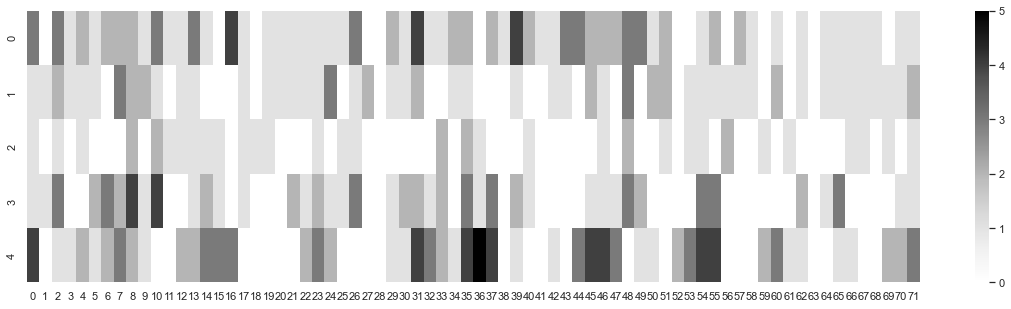

In [98]:
ax = sns.heatmap(binned, cmap= "Greys")